In [72]:
'''


Cambios:
        - Renombre de columna Valor - Cuenta
        - Creacion de barras para analizar crecimiento / decrecimiento x a_o
        -Ajuste de practica de normalizacion, en base al crecimiento poblacional (# de poblacion en territorio mexicano), en los a;os.
                        - Para una mejor resolucion, deberiamos a ver normaliado en base a los estados, dado que es mayor la granulalidad, o incluso los municipios
                        
        - En este set de datos, no se puede hacer una correlacion 'Aun', por que no tenemos dos variables numericas, en un principio pense que el a;o era una, hahaha error mio.
        
        
        -Abra que tratar de nuevo sin pivotaje a ver si podemos obtener alguna informacion asi


'''


'''
        Preguntas acerca del set de datos
        
        Al inicio ignore que los datos vinieran por mes, de echo pivote en base a eso para hacerlo mas practico, segun yo, pero resulta que eso es un HOT - ENCODING inverso, o algo por el estilo
        - Espera no es un HOT encoding, o si es que representa la cuenta en ese mes, que beneficios tiene manejarlo de esa forma
        
        
        - Implementacion de un hot encoding en el area de abusos, para ver asi la cantidad y la distribucion para compararlos por casos y no por meses
        
        
        - Dentro de la investigacion destacan los estados de: Edo. Mexico / Mexico / Jalisco
        
        22-04
        - Cambios en los valores de violacion simple y violacion equiparada, por el tipo de coma, no funcionaban correctamente

'''

'\n        Preguntas acerca del set de datos\n        \n        Al inicio ignore que los datos vinieran por mes, de echo pivote en base a eso para hacerlo mas practico, segun yo, pero resulta que eso es un HOT - ENCODING inverso, o algo por el estilo\n        - Espera no es un HOT encoding, o si es que representa la cuenta en ese mes, que beneficios tiene manejarlo de esa forma\n        \n        \n        - Implementacion de un hot encoding en el area de abusos, para ver asi la cantidad y la distribucion para compararlos por casos y no por meses\n        \n        \n        - Dentro de la investigacion destacan los estados de: Edo. Mexico / Mexico / Jalisco\n        \n        22-04\n        - Cambios en los valores de violacion simple y violacion equiparada, por el tipo de coma, no funcionaban correctamente\n\n'

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from tabulate import tabulate # Ayuda en la parte de mejorar la impresion, para una mejor visualizacion
#from pprint import pprint


In [74]:
df_sex_agresion =  pd.read_csv('sexual_agre_cleaned.csv')

In [75]:
df_sex_agresion.shape

(12089, 6)

In [76]:
print(tabulate(df_sex_agresion.head(5), headers='keys', tablefmt='pipe'))
'''
    Variables numericas:
                            A_o
                            Cuenta
    
    Variables Categoricas
                            Estado
                            Tipo y Sub tipo
                            Mes
                            Cuenta

'''

|    |   A_o | Estado   | Tipo_de_abuso                                                      | Subtipo_de_Abuso                                                   | Mes   |   Valor |
|---:|------:|:---------|:-------------------------------------------------------------------|:-------------------------------------------------------------------|:------|--------:|
|  0 |  2015 | Puebla   | Acoso sexual                                                       | Acoso sexual                                                       | Enero |      11 |
|  1 |  2015 | Puebla   | Hostigamiento sexual                                               | Hostigamiento sexual                                               | Enero |       1 |
|  2 |  2015 | Puebla   | Violaci�n simple                                                   | Violaci�n simple                                                   | Enero |      43 |
|  3 |  2015 | Puebla   | Violaci�n equiparada                                            

'\n    Variables numericas:\n                            A_o\n                            Cuenta\n    \n    Variables Categoricas\n                            Estado\n                            Tipo y Sub tipo\n                            Mes\n                            Cuenta\n\n'

In [77]:
df_sex_agresion.rename(columns={'Valor': 'Cuenta'}, inplace= True) # Sin el implace, tendriamos que instanciar otro objeto para poder cambiar el nombre

# Cambio de nombre de valores

In [78]:
df_sex_agresion.Tipo_de_abuso.unique()

array(['Acoso sexual', 'Hostigamiento sexual', 'Violaci�n simple',
       'Violaci�n equiparada',
       'Otros delitos que atentan contra la libertad y la seguridad sexual',
       'Abuso sexual'], dtype=object)

In [79]:
''' Pasando nuevos parametros para un mejor manejo de los datos'''

df_sex_agresion['Tipo_de_abuso'] = df_sex_agresion['Tipo_de_abuso'].replace('Violaci�n simple', 'Violacion simple')
df_sex_agresion['Tipo_de_abuso'] = df_sex_agresion['Tipo_de_abuso'].replace('Violaci�n equiparada', 'Violacion Equiparada')
df_sex_agresion['Subtipo_de_Abuso'] = df_sex_agresion['Subtipo_de_Abuso'].replace('Violaci�n simple', 'Violacion simple')
df_sex_agresion['Subtipo_de_Abuso'] = df_sex_agresion['Subtipo_de_Abuso'].replace('Violaci�n equiparada', 'Violacion Equiparada')

In [80]:
df_sex_agresion['Tipo_de_abuso'].unique()

array(['Acoso sexual', 'Hostigamiento sexual', 'Violacion simple',
       'Violacion Equiparada',
       'Otros delitos que atentan contra la libertad y la seguridad sexual',
       'Abuso sexual'], dtype=object)

# Analisis Univariable

##### Variables Numericas

In [83]:
'''Analisis de frecuencias ponderado'''

# Frecuencias ponderadas por Estado
Frec_estado_ponderada = df_sex_agresion.groupby('Estado')['Cuenta'].sum().sort_values(ascending=False)

print(Frec_estado_ponderada)
# me mame en este caso no es necesario por el echo que la cantidad de datos sera igual, el valor de interes es la cuenta

Estado
Mexico                             36831
Ciudad de Mexico                   32289
Jalisco                            20710
Nuevo Leon                         18441
Chihuahua                          16651
Baja California                    15806
Veracruz de Ignacio de la Llave    12569
Puebla                             12020
Guanajuato                         11370
Quintana Roo                        8144
Queretaro                           7661
Hidalgo                             7649
San Luis Potosi                     7328
Chiapas                             7038
Tamaulipas                          7031
Coahuila de Zaragoza                6942
Oaxaca                              6797
Tabasco                             6439
Morelos                             5941
Michoacan de Ocampo                 5930
Durango                             5000
Sonora                              4650
Aguascalientes                      4135
Guerrero                            3974
Sinaloa  

In [24]:
df_sex_agresion['Tipo_de_abuso'].unique()


array(['Acoso sexual', 'Hostigamiento sexual', 'Violaci�n simple',
       'Violaci�n equiparada',
       'Otros delitos que atentan contra la libertad y la seguridad sexual',
       'Abuso sexual'], dtype=object)

In [25]:

cases_ac = sum(df_sex_agresion['Tipo_de_abuso'] == 'Acoso sexual')
cases_ab = sum(df_sex_agresion['Tipo_de_abuso'] == 'Abuso sexual')

print(cases_ab)
print(cases_ab)

2009
2009


In [26]:
Relacion_tipo_abuso = df_sex_agresion['Tipo_de_abuso'] == ''

In [27]:
df_sex_agresion.columns

Index(['A_o', 'Estado', 'Tipo_de_abuso', 'Subtipo_de_Abuso', 'Mes', 'Cuenta'], dtype='object')

#### Analisis Bi-Variable

###### Normalizacion datos

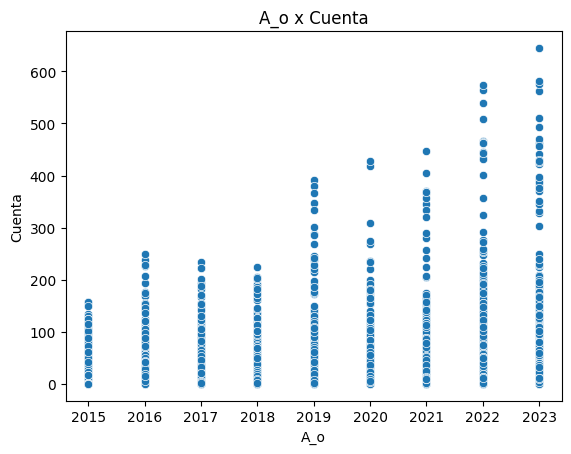

In [28]:
''' Dado que tenemos dos variables numericas empezare por ahi para ver como se relaciona el a;o con la cuenta'''

sns.scatterplot( x = 'A_o', y = 'Cuenta' , data= df_sex_agresion)
plt.title('A_o x Cuenta')
plt.show()

# NO ES UTIL EN REALIDAD, LOS DATOS ESTAN MUY SUPER PUESTOS

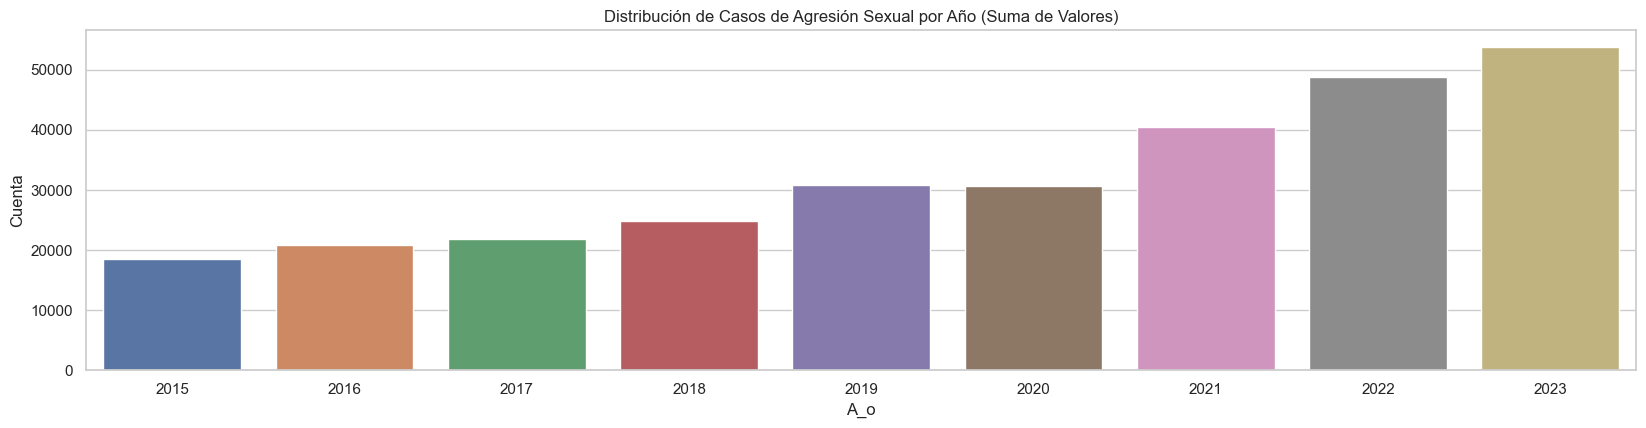

In [29]:
''' Cabe senalar que los datos no estan normalizados a el crecimiento de la poblacion, por lo cual no se puede saber
    si los casos estan disminuyendo o aumentando, necesitamos saber las cifras de la poblacion para poder hacer ese ajuste'''
    
    
# Configurar el estilo estético de las gráficas con Seaborn
sns.set_theme(style="whitegrid")

# Inicializar la figura donde se mostrarán las gráficas
# Establecemos el tamaño de la figura en 20x15
plt.figure(figsize=(20, 15))

# Crear un subplot para la primera gráfica
# El primer número '3' indica que habrá 3 filas de gráficos
# El segundo número '1' indica que habrá 1 columna de gráficos
# El tercer número '1' indica que este es el primer gráfico
plt.subplot(3, 1, 1)

# Crear un gráfico de barras para mostrar la distribución por año
# 'data=df' especifica el DataFrame que estamos usando
# 'x='A_o'' y 'y='Valor'' especifican las columnas del DataFrame que se usarán para el eje x e y, respectivamente
# 'estimator=sum' indica que queremos sumar los valores para cada categoría, en lugar de contarlos
# 'ci=None' elimina el intervalo de confianza que Seaborn muestra por defecto
sns.barplot(data=df_sex_agresion, x='A_o', y='Cuenta', estimator=sum, errorbar=None)

# Añadir un título a la gráfica
plt.title('Distribución de Casos de Agresión Sexual por Año (Suma de Valores)')

plt.show()

In [30]:
"""
Normalizacion de la Cuenta en base a la poblacion de Mexico respecto a los a;os

"""

poblacion_por_ao = {
2015 :  119530753,
2016 :	121348000,
2017 :	122720000,
2018 :	124042000,
2019 :	125338000,
2020 :	126014024,
2021 :	128972000,
2022 :	130124000,
2023 :	131230000
}

# Añadir una nueva columna para los datos normalizados
df_sex_agresion['Cuenta_Normalizada'] = df_sex_agresion.apply(lambda row: (row['Cuenta'] / poblacion_por_ao[row['A_o']]) * 1000, axis=1)

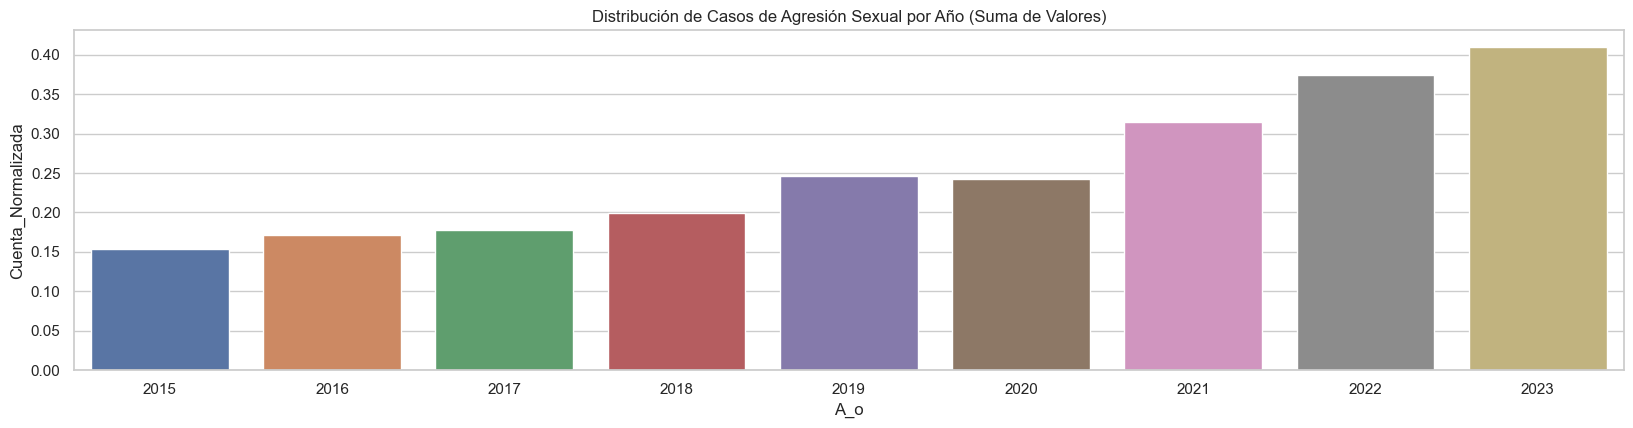

In [31]:
# Configurar el estilo estético de las gráficas con Seaborn
sns.set_theme(style="whitegrid")

# Inicializar la figura donde se mostrarán las gráficas
# Establecemos el tamaño de la figura en 20x15
plt.figure(figsize=(20, 15))

# Crear un subplot para la primera gráfica
# El primer número '3' indica que habrá 3 filas de gráficos
# El segundo número '1' indica que habrá 1 columna de gráficos
# El tercer número '1' indica que este es el primer gráfico
plt.subplot(3, 1, 1)

# Crear un gráfico de barras para mostrar la distribución por año
# 'data=df' especifica el DataFrame que estamos usando
# 'x='A_o'' y 'y='Valor'' especifican las columnas del DataFrame que se usarán para el eje x e y, respectivamente
# 'estimator=sum' indica que queremos sumar los valores para cada categoría, en lugar de contarlos
# 'ci=None' elimina el intervalo de confianza que Seaborn muestra por defecto
sns.barplot(data=df_sex_agresion, x='A_o', y='Cuenta_Normalizada', estimator=sum, errorbar=None)

# Añadir un título a la gráfica
plt.title('Distribución de Casos de Agresión Sexual por Año (Suma de Valores)')

plt.show()

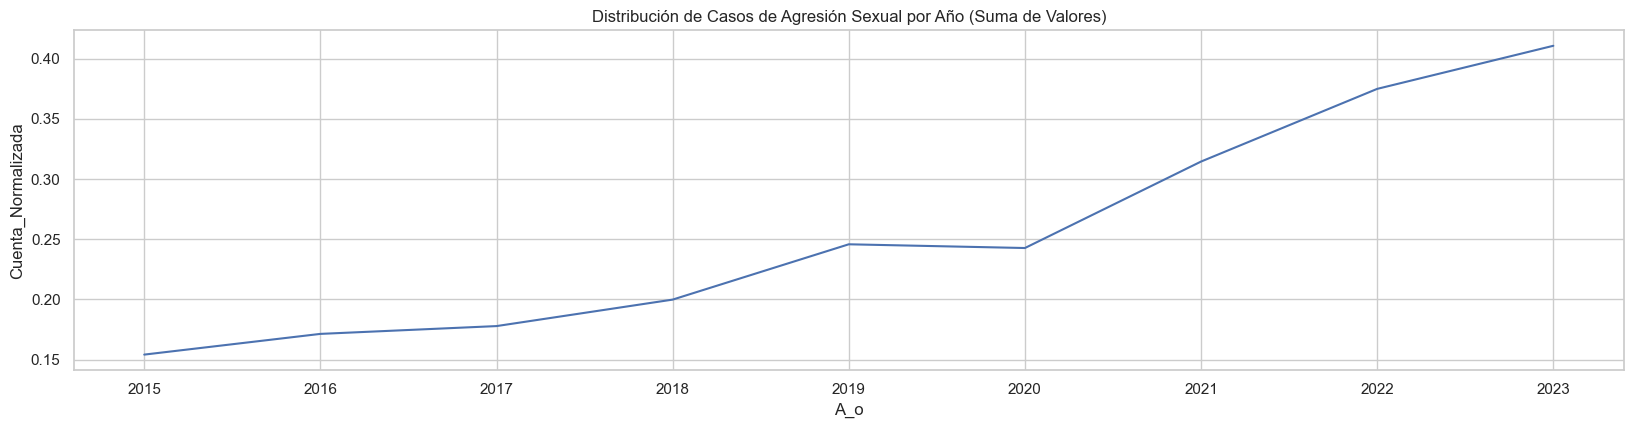

In [32]:
# Mantenemos el estilo y la figura como en tu código original
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 15))

# Usamos lineplot en lugar de barplot
plt.subplot(3, 1, 1)
sns.lineplot(data=df_sex_agresion, x='A_o', y='Cuenta_Normalizada', estimator=sum, err_style=None)

# Título
plt.title('Distribución de Casos de Agresión Sexual por Año (Suma de Valores)')

plt.show()

##

###### 

In [33]:
''' Despues de normalizar podemos ver que en el 19 - 20, se redujo casi nada, entonces en otras palabras a estado creciendo con datos ya normalizados'''

' Despues de normalizar podemos ver que en el 19 - 20, se redujo casi nada, entonces en otras palabras a estado creciendo con datos ya normalizados'

###### Analisis Bi Variable Estado_ Cuenta normalizada

Text(0.5, 1.0, 'Distribución de Casos de Agresión Sexual por Estado (Normalizacion de Valores)')

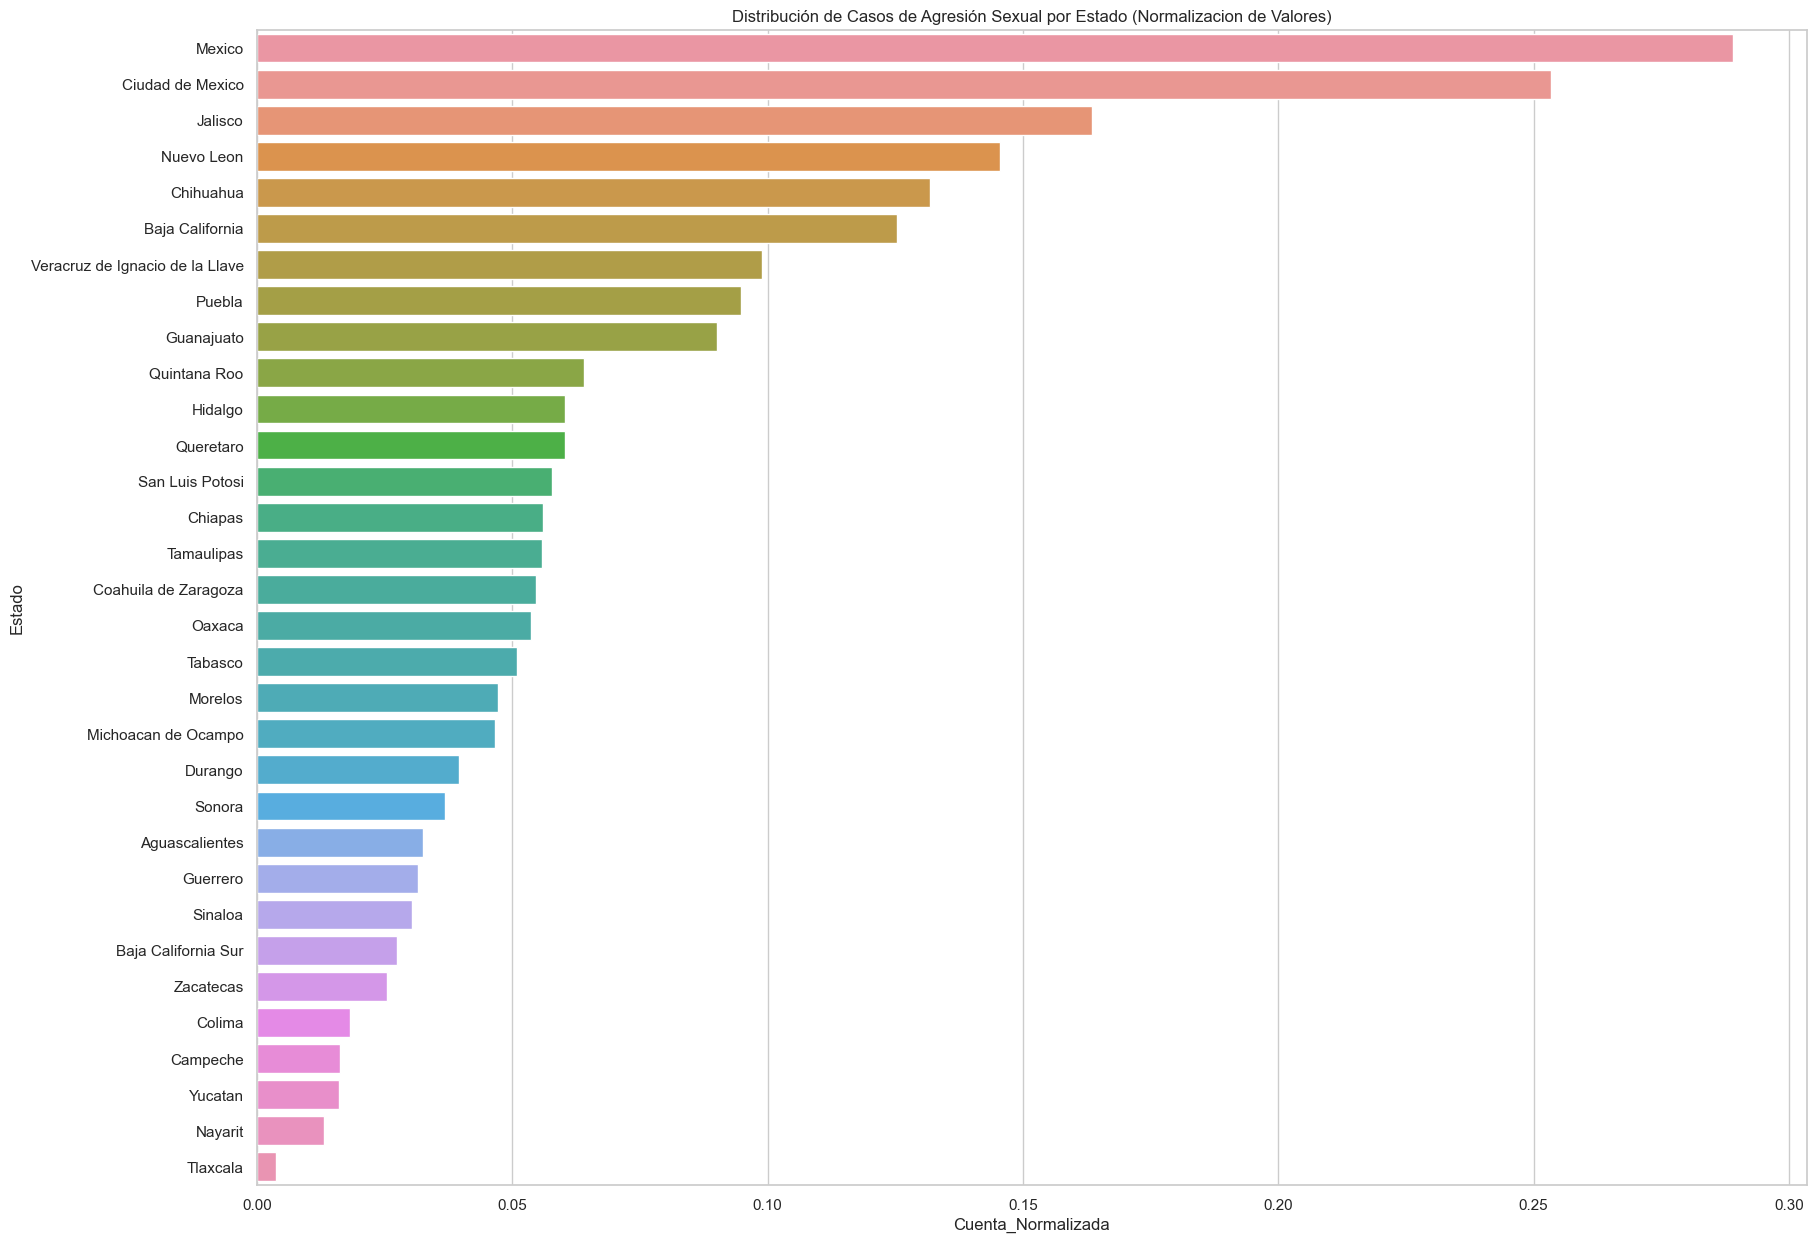

In [34]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 15))
sns.barplot(data=df_sex_agresion, y ='Estado', x ='Cuenta_Normalizada', estimator=sum, errorbar=None, order = df_sex_agresion.groupby('Estado')['Cuenta_Normalizada'].sum().sort_values(ascending=False).index)
#sns.barplot(data=df_sex_agreson, y='Estado', x='Valor', estimator=sum, ci= None, order = df_sex_agreson.groupby('Estado')['Valor'].sum().sort_values(ascending=False).index)
# Añadir un título a la gráfica
plt.title('Distribución de Casos de Agresión Sexual por Estado (Normalizacion de Valores)')

# plt.show()df_sex_agresion.groupby('Estado'): Aquí, el DataFrame se agrupa por la columna Estado. Esto crea un nuevo objeto de grupo donde los datos están agrupados según los distintos estados.

# ['Cuenta_Normalizada']: Después de agrupar, seleccionamos la columna Cuenta_Normalizada para realizar operaciones adicionales en ella.

# .sum(): Suma los valores de Cuenta_Normalizada para cada estado. Esto te da una suma total de Cuenta_Normalizada por estado.

# .sort_values(ascending=False): Ordena los valores sumados de forma descendente. Así, el estado con la mayor suma de Cuenta_Normalizada estará primero.

# .index: Finalmente, toma los índices de estos valores ordenados (que son los nombres de los estados) y los usa para el parámetro order.

# 🔄 Cómo Itera
# Primero, groupby agrupa todas las filas que tienen el mismo estado.
# Luego, para cada grupo, se suman los valores en la columna Cuenta_Normalizada.
# Estos valores sumados se ordenan de mayor a menor.
# Los índices (nombres de los estados) de estos valores ordenados se extraen y se usan para determinar el orden en que se mostrarán las barras en el gráfico.
#los indices son los estados, por asi decirlos, ordenados

In [35]:
''' Antes de la pandemia, parecia haber establecido un ritmo y pensariamos que la curva comenzaria a aplanarce, pero parece que el resentimiento
    o algo en la pandemia, hubo mas casos, pero no creo que esto sea solo culpa de la pandemia, debe haber mas
'''

' Antes de la pandemia, parecia haber establecido un ritmo y pensariamos que la curva comenzaria a aplanarce, pero parece que el resentimiento\n    o algo en la pandemia, hubo mas casos, pero no creo que esto sea solo culpa de la pandemia, debe haber mas\n'

In [36]:
df_sex_agresion.columns

Index(['A_o', 'Estado', 'Tipo_de_abuso', 'Subtipo_de_Abuso', 'Mes', 'Cuenta',
       'Cuenta_Normalizada'],
      dtype='object')

Text(0.5, 1.0, 'Distribución de Casos de Agresión Sexual por Tipo_de_abuso (Normalizacion de Valores)')

C:\Users\Edgar\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  func(*args, **kwargs)
C:\Users\Edgar\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


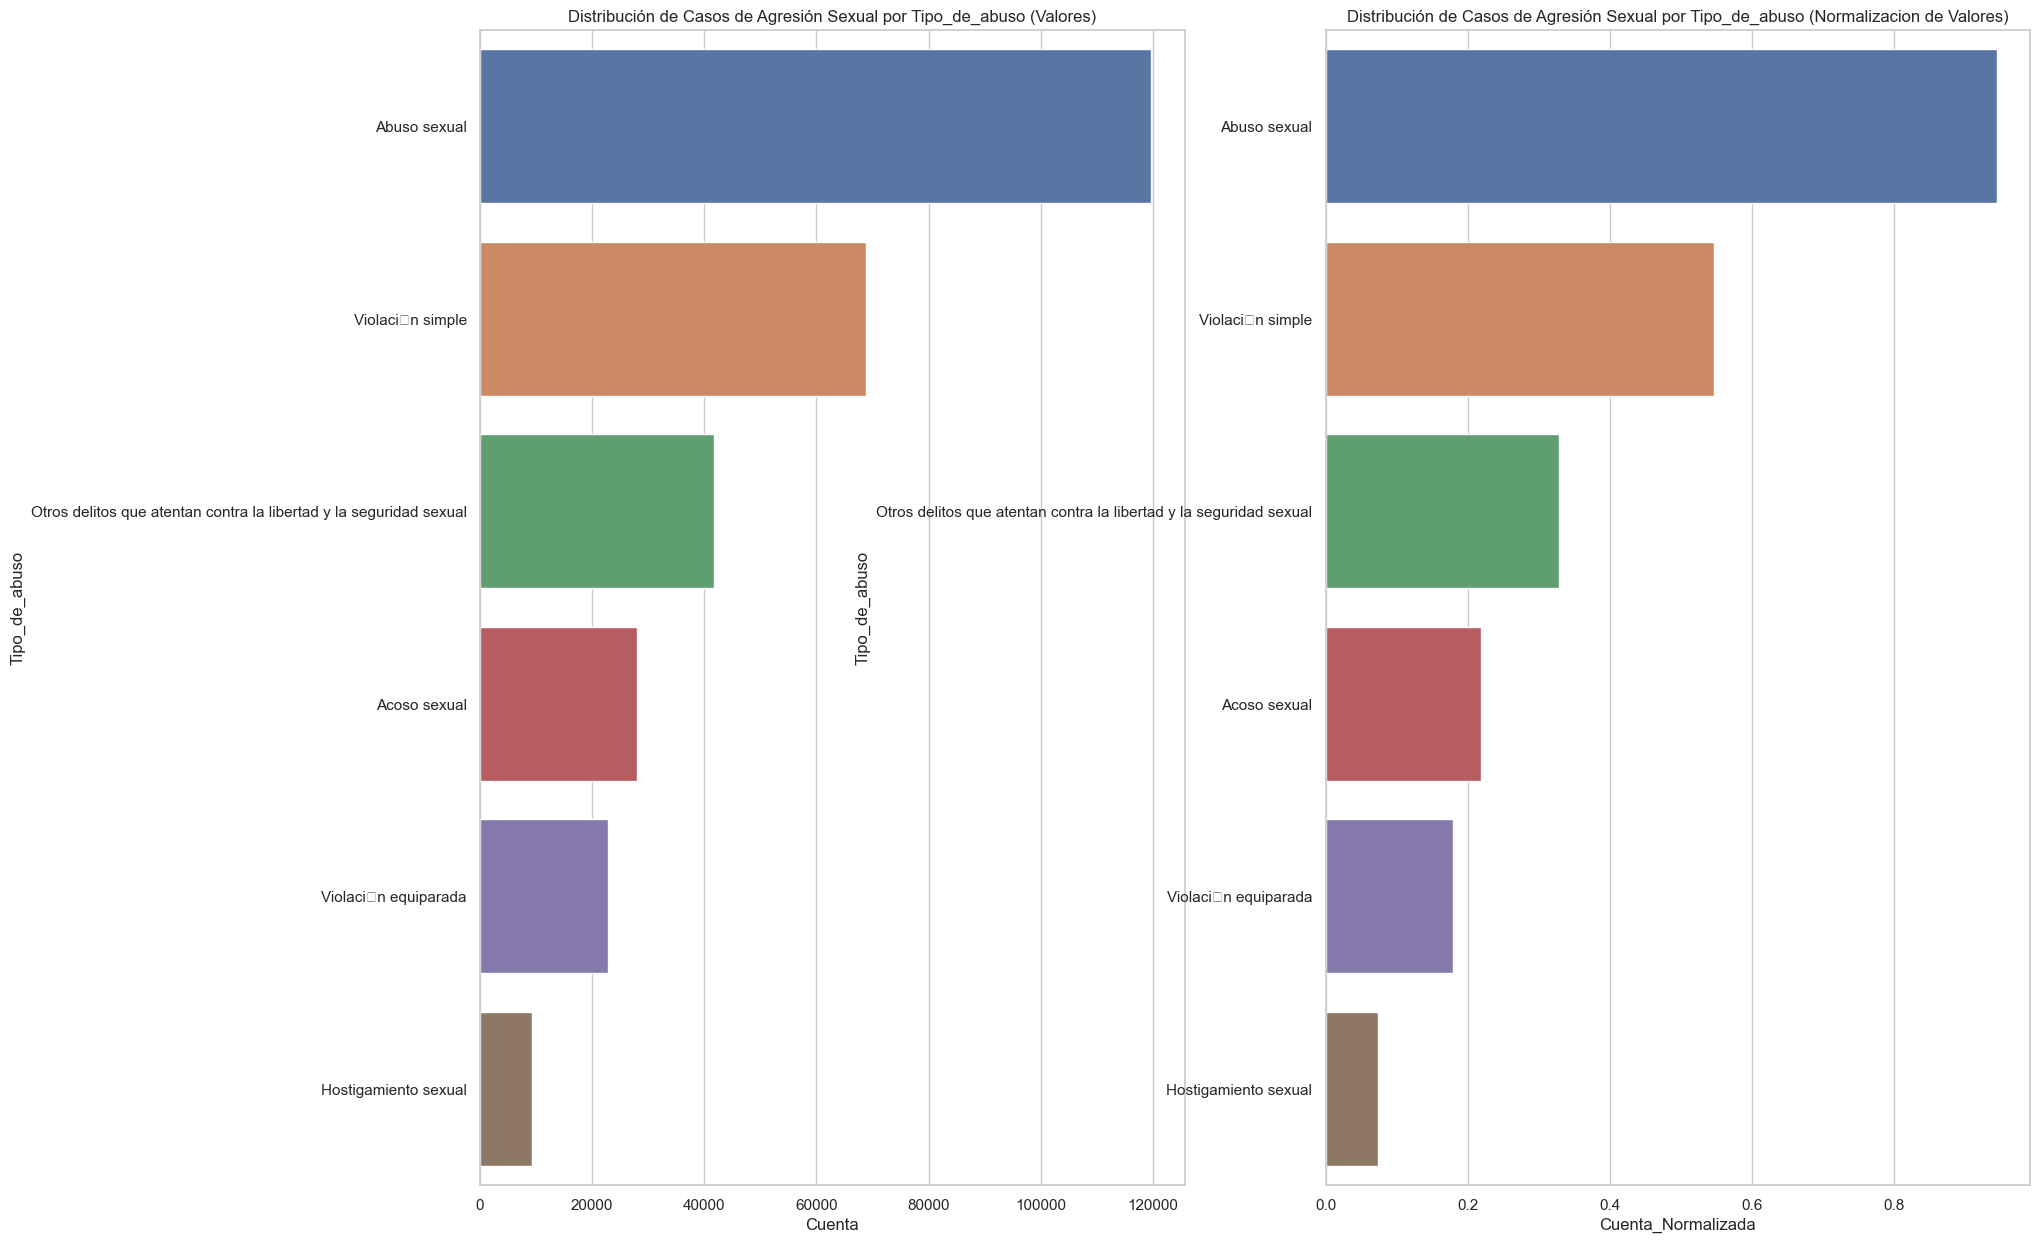

In [37]:
sns.set_theme(style='whitegrid') # Podriamos ver otros disenos a ver cual nos parece mas amigable / o el que simplemente nos guste mas

plt.figure(figsize=(20, 15))
plt.subplot(1,2,1)
sns.barplot(data=df_sex_agresion, y ='Tipo_de_abuso', x ='Cuenta', estimator=sum, errorbar=None, order = df_sex_agresion.groupby('Tipo_de_abuso')['Cuenta_Normalizada'].sum().sort_values(ascending=False).index)
plt.title('Distribución de Casos de Agresión Sexual por Tipo_de_abuso (Valores)')

plt.subplot(1,2,2)
sns.barplot(data=df_sex_agresion, y ='Tipo_de_abuso', x ='Cuenta_Normalizada' , estimator=sum, errorbar=None, order = df_sex_agresion.groupby('Tipo_de_abuso')['Cuenta_Normalizada'].sum().sort_values(ascending=False).index)
plt.title('Distribución de Casos de Agresión Sexual por Tipo_de_abuso (Normalizacion de Valores)')


In [38]:
#df_sex_agresion.describe()
df_sex_agresion.info()

df_sex_agresion[['Estado']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12089 entries, 0 to 12088
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   A_o                 12089 non-null  int64  
 1   Estado              12089 non-null  object 
 2   Tipo_de_abuso       12089 non-null  object 
 3   Subtipo_de_Abuso    12089 non-null  object 
 4   Mes                 12089 non-null  object 
 5   Cuenta              12089 non-null  int64  
 6   Cuenta_Normalizada  12089 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 661.2+ KB


,Estado
0,Puebla
1,Puebla
2,Puebla
3,Puebla
4,Puebla
...,...
12084,Oaxaca
12085,Oaxaca
12086,Oaxaca
12087,Oaxaca


# USO DE SMALL MULTIPLES 

c:\Users\Edgar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_18612\1509181526.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


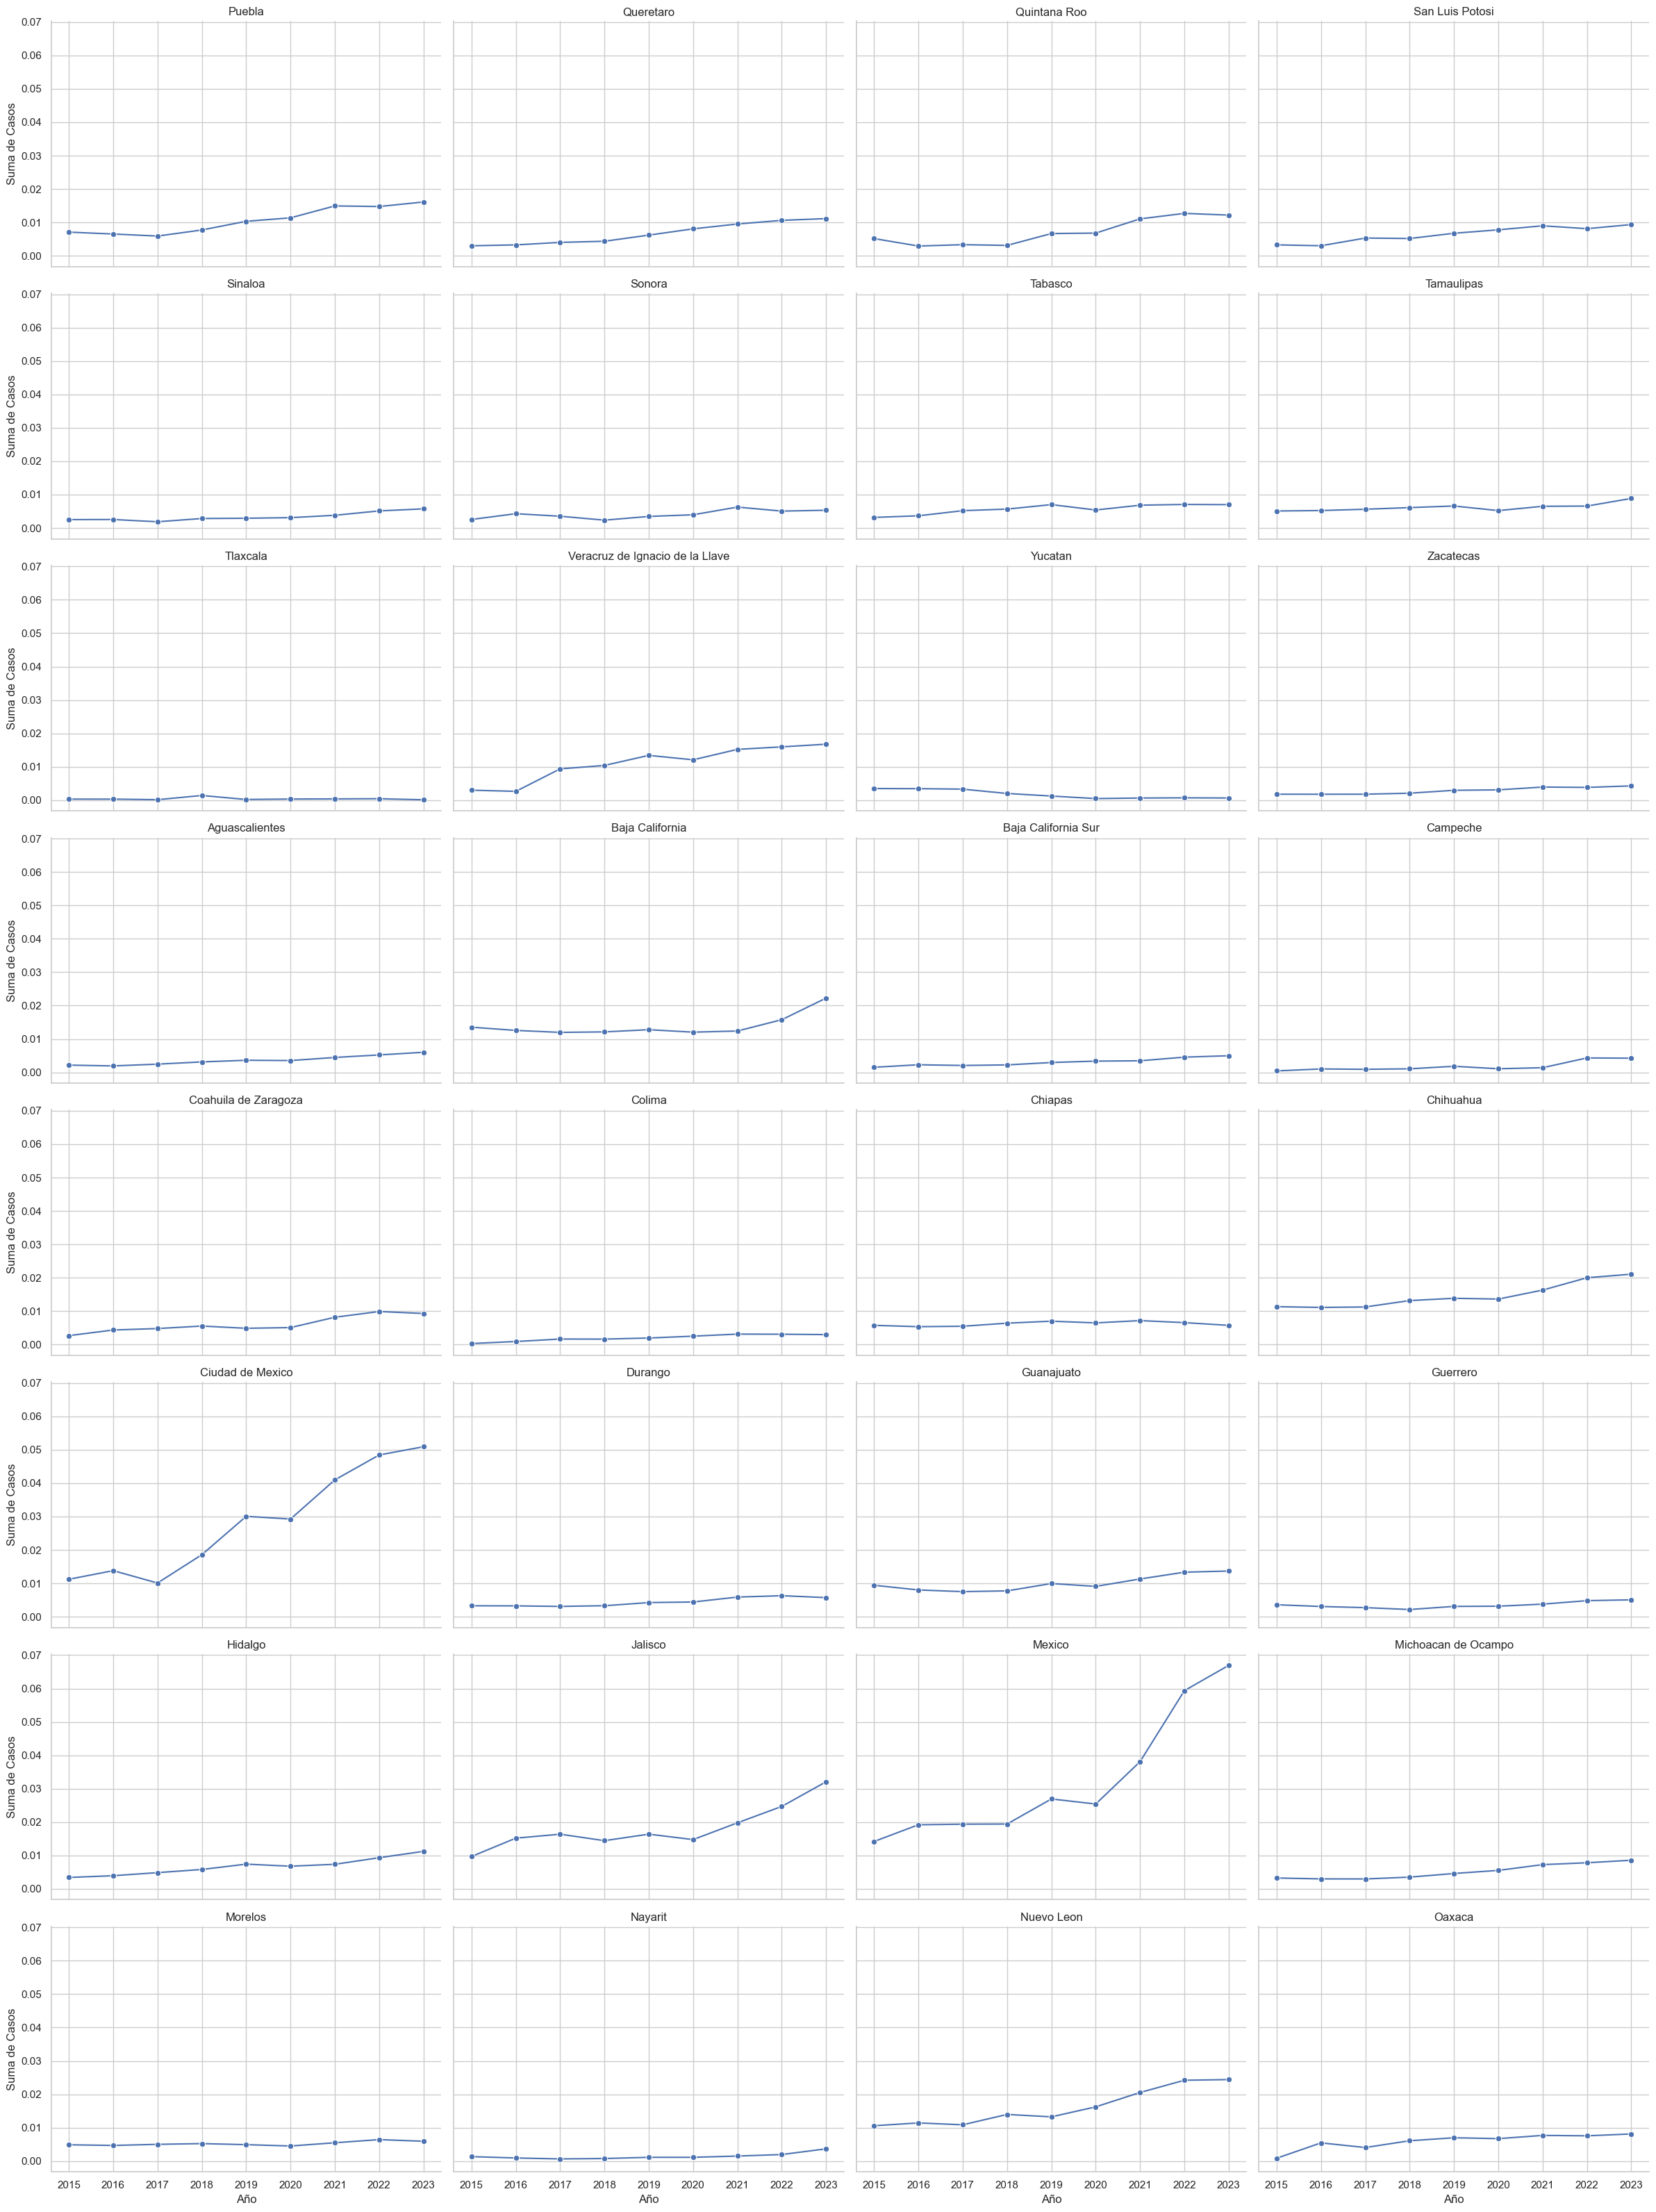

' Revisar cambios o contra parte con la cuenta normal / no la normalizada'

In [39]:
# Inicializar un FacetGrid para crear "small multiples"
# Aquí, col="Estado" significa que queremos un subgráfico para cada estado único
# col_wrap=4 significa que queremos 4 subgráficos por fila
# height=4 y aspect=1.5 definen el tamaño y la forma de cada subgráfico
g = sns.FacetGrid(df_sex_agresion, col="Estado", col_wrap=4, height=4, aspect=1.5)

# Mapear un gráfico de líneas en cada FacetGrid
# Utilizamos sns.lineplot para dibujar el gráfico de líneas en cada subgráfico
# "A_o" es el eje x y "Valor" es el eje y
# estimator = sum significa que estamos sumando todos los valores para cada año (en lugar de, por ejemplo, calcular un promedio)
# errorbar = None significa que no queremos mostrar el intervalo de confianza alrededor de la línea de tendencia
# marker ....?
g.map(sns.lineplot, "A_o", "Cuenta_Normalizada", estimator=sum, errorbar=None, marker='o')

# Añadir etiquetas a los ejes y títulos a los subgráficos
# set_axis_labels nos permite etiquetar los ejes x e y
# set_titles añade un título a cada subgráfico basado en el valor de la columna "Estado"
g.set_axis_labels("Año", "Suma de Casos")
g.set_titles("{col_name}")

# Mostrar el gráfico ajustando el diseño para que todo encaje bien
plt.tight_layout()
plt.show()


''' Revisar cambios o contra parte con la cuenta normal / no la normalizada'''

In [40]:
df_sex_agresion['Tipo_de_abuso'].unique()

array(['Acoso sexual', 'Hostigamiento sexual', 'Violaci�n simple',
       'Violaci�n equiparada',
       'Otros delitos que atentan contra la libertad y la seguridad sexual',
       'Abuso sexual'], dtype=object)

c:\Users\Edgar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_18612\3534257950.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


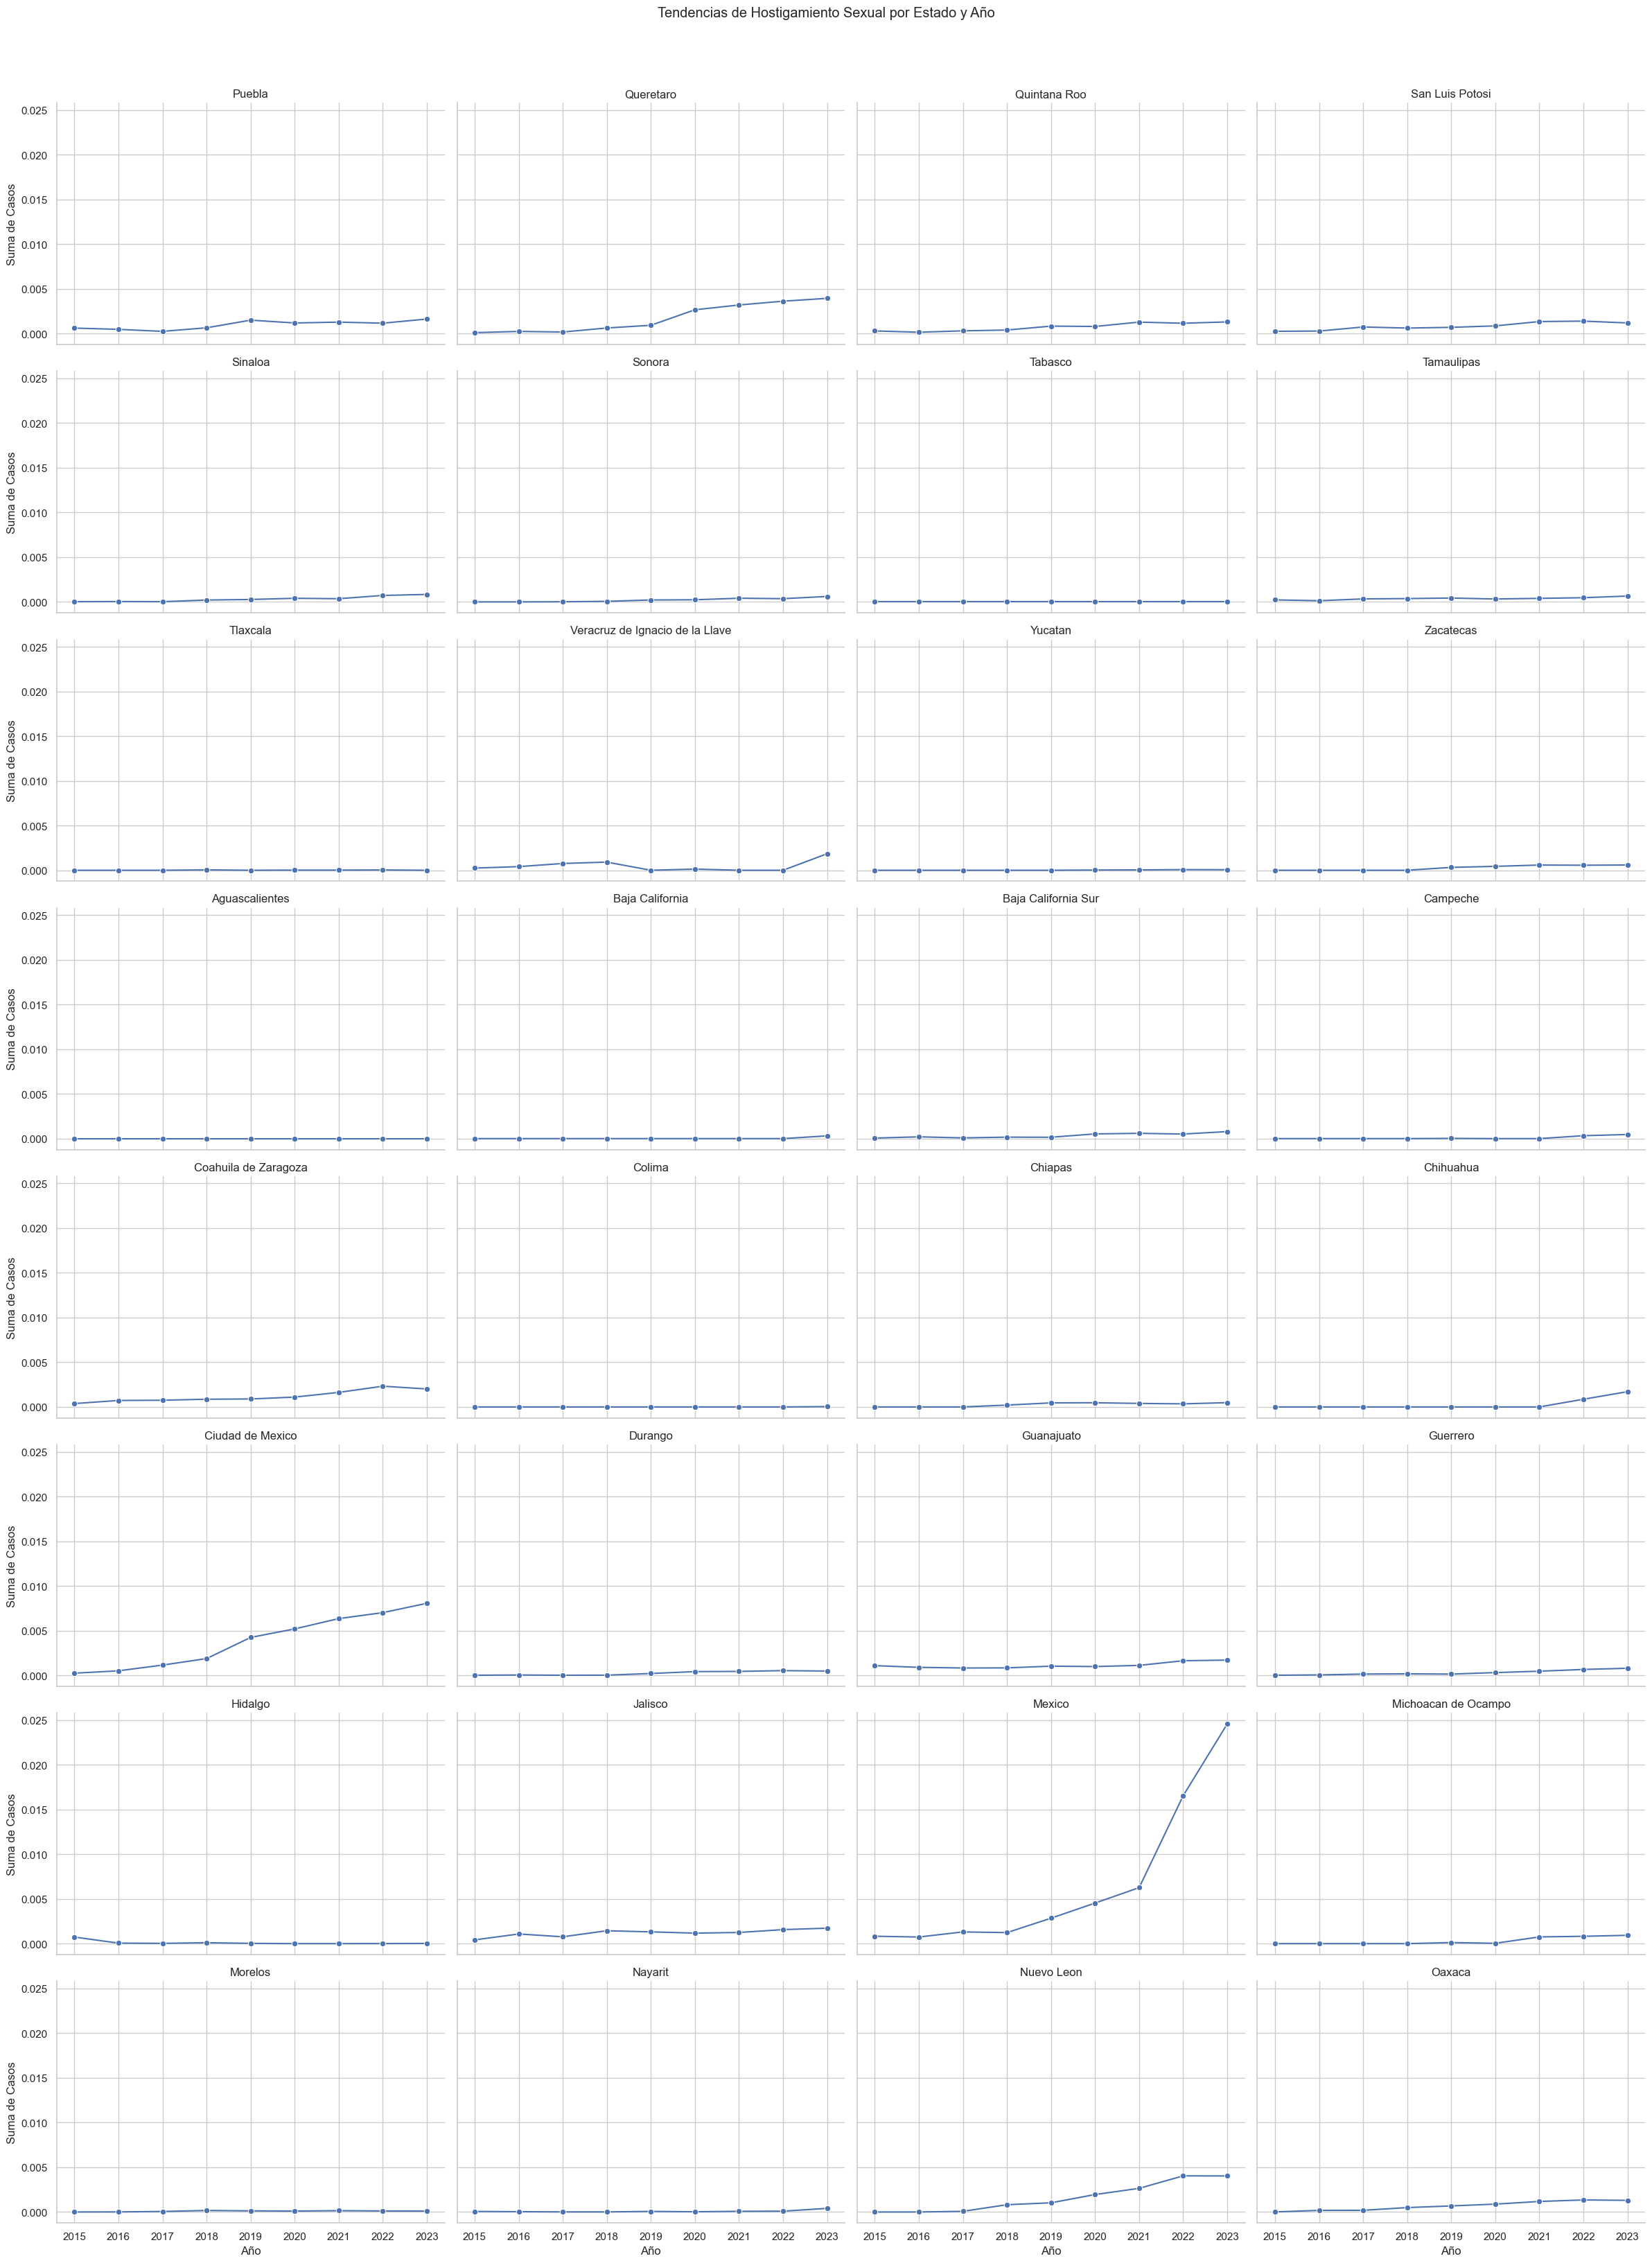

In [41]:
# Filter the data to focus only on "Hostigamiento sexual"
df_hostigamiento_sexual = df_sex_agresion[df_sex_agresion['Tipo_de_abuso'] == 'Acoso sexual']
# Inicializar un FacetGrid para crear "small multiples" (múltiples subgráficos).
# El argumento 'col' indica que queremos un subgráfico por cada estado.
# 'col_wrap=4' establece que habrá 4 subgráficos por fila.
# 'height=4' y 'aspect=1.5' controlan el tamaño de cada subgráfico.
g = sns.FacetGrid(df_hostigamiento_sexual, col="Estado", col_wrap=4, height=4, aspect=1.5)

# Mapear un gráfico de líneas en cada FacetGrid.
# El primer argumento indica el eje x ("A_o" para año), y el segundo es el eje y ("Valor").
# 'estimator=sum' suma todos los valores para cada año.
# 'ci=None' desactiva el intervalo de confianza alrededor de la línea.
# 'marker='o'' usa círculos como marcadores en la línea.
g.map(sns.lineplot, "A_o", "Cuenta_Normalizada", estimator=sum, errorbar=None, marker='o')

# Añadir títulos y etiquetas a los ejes.
# 'set_axis_labels' añade etiquetas a los ejes x e y.
# 'set_titles' añade un título a cada subgráfico, usando el nombre del estado.
g.set_axis_labels("Año", "Suma de Casos")
g.set_titles("{col_name}")

# Añadir un título general a toda la figura
g.fig.suptitle('Tendencias de Hostigamiento Sexual por Estado y Año', y=1.02)


# Mostrar el gráfico.
# 'tight_layout()' ajusta automáticamente los subgráficos para que no se superpongan.
plt.tight_layout()
plt.show()

In [42]:
df_sex_agresion['Tipo_de_abuso'].unique()

array(['Acoso sexual', 'Hostigamiento sexual', 'Violaci�n simple',
       'Violaci�n equiparada',
       'Otros delitos que atentan contra la libertad y la seguridad sexual',
       'Abuso sexual'], dtype=object)

c:\Users\Edgar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_18612\3903199610.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


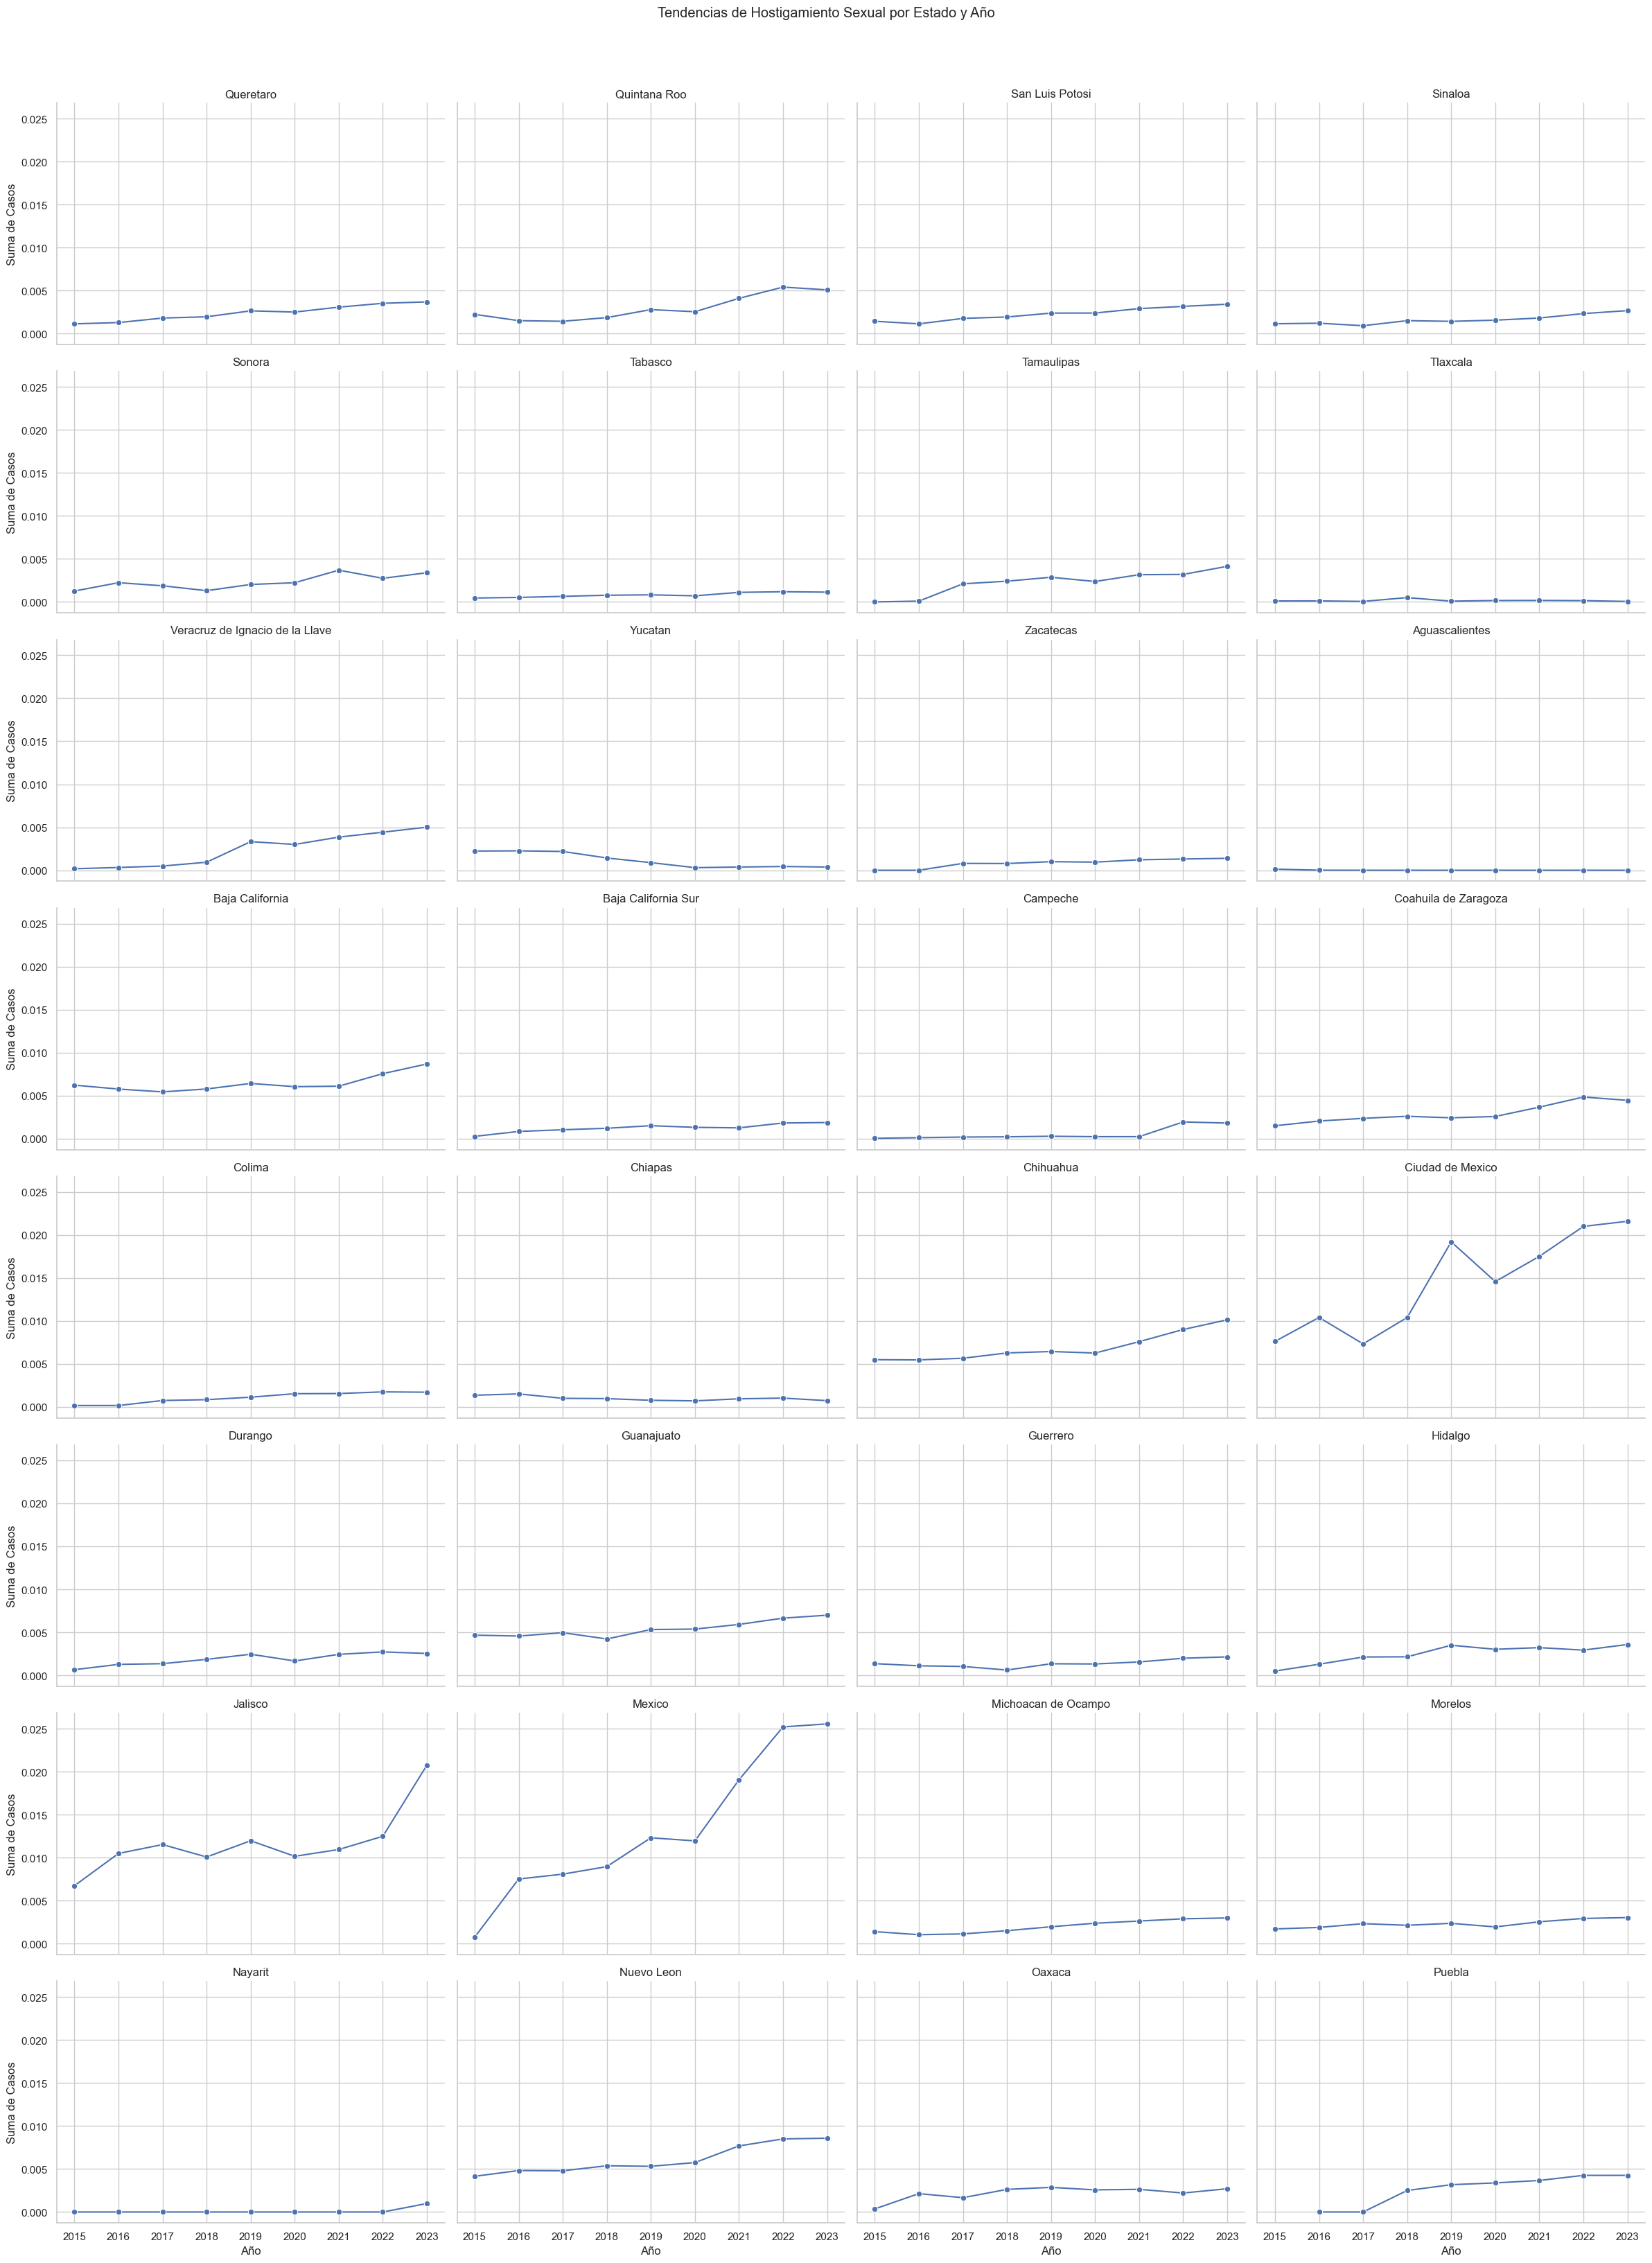

In [43]:
# Filter the data to focus only on "Hostigamiento sexual"
df_hostigamiento_sexual = df_sex_agresion[df_sex_agresion['Tipo_de_abuso'] == 'Abuso sexual']
# Inicializar un FacetGrid para crear "small multiples" (múltiples subgráficos).
# El argumento 'col' indica que queremos un subgráfico por cada estado.
# 'col_wrap=4' establece que habrá 4 subgráficos por fila.
# 'height=4' y 'aspect=1.5' controlan el tamaño de cada subgráfico.
g = sns.FacetGrid(df_hostigamiento_sexual, col="Estado", col_wrap=4, height=4, aspect=1.5)

# Mapear un gráfico de líneas en cada FacetGrid.
# El primer argumento indica el eje x ("A_o" para año), y el segundo es el eje y ("Valor").
# 'estimator=sum' suma todos los valores para cada año.
# 'ci=None' desactiva el intervalo de confianza alrededor de la línea.
# 'marker='o'' usa círculos como marcadores en la línea.
g.map(sns.lineplot, "A_o", "Cuenta_Normalizada", estimator=sum, errorbar=None, marker='o')

# Añadir títulos y etiquetas a los ejes.
# 'set_axis_labels' añade etiquetas a los ejes x e y.
# 'set_titles' añade un título a cada subgráfico, usando el nombre del estado.
g.set_axis_labels("Año", "Suma de Casos")
g.set_titles("{col_name}")

# Añadir un título general a toda la figura
g.fig.suptitle('Tendencias de Hostigamiento Sexual por Estado y Año', y=1.02)


# Mostrar el gráfico.
# 'tight_layout()' ajusta automáticamente los subgráficos para que no se superpongan.
plt.tight_layout()
plt.show()

c:\Users\Edgar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_18612\2372841958.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


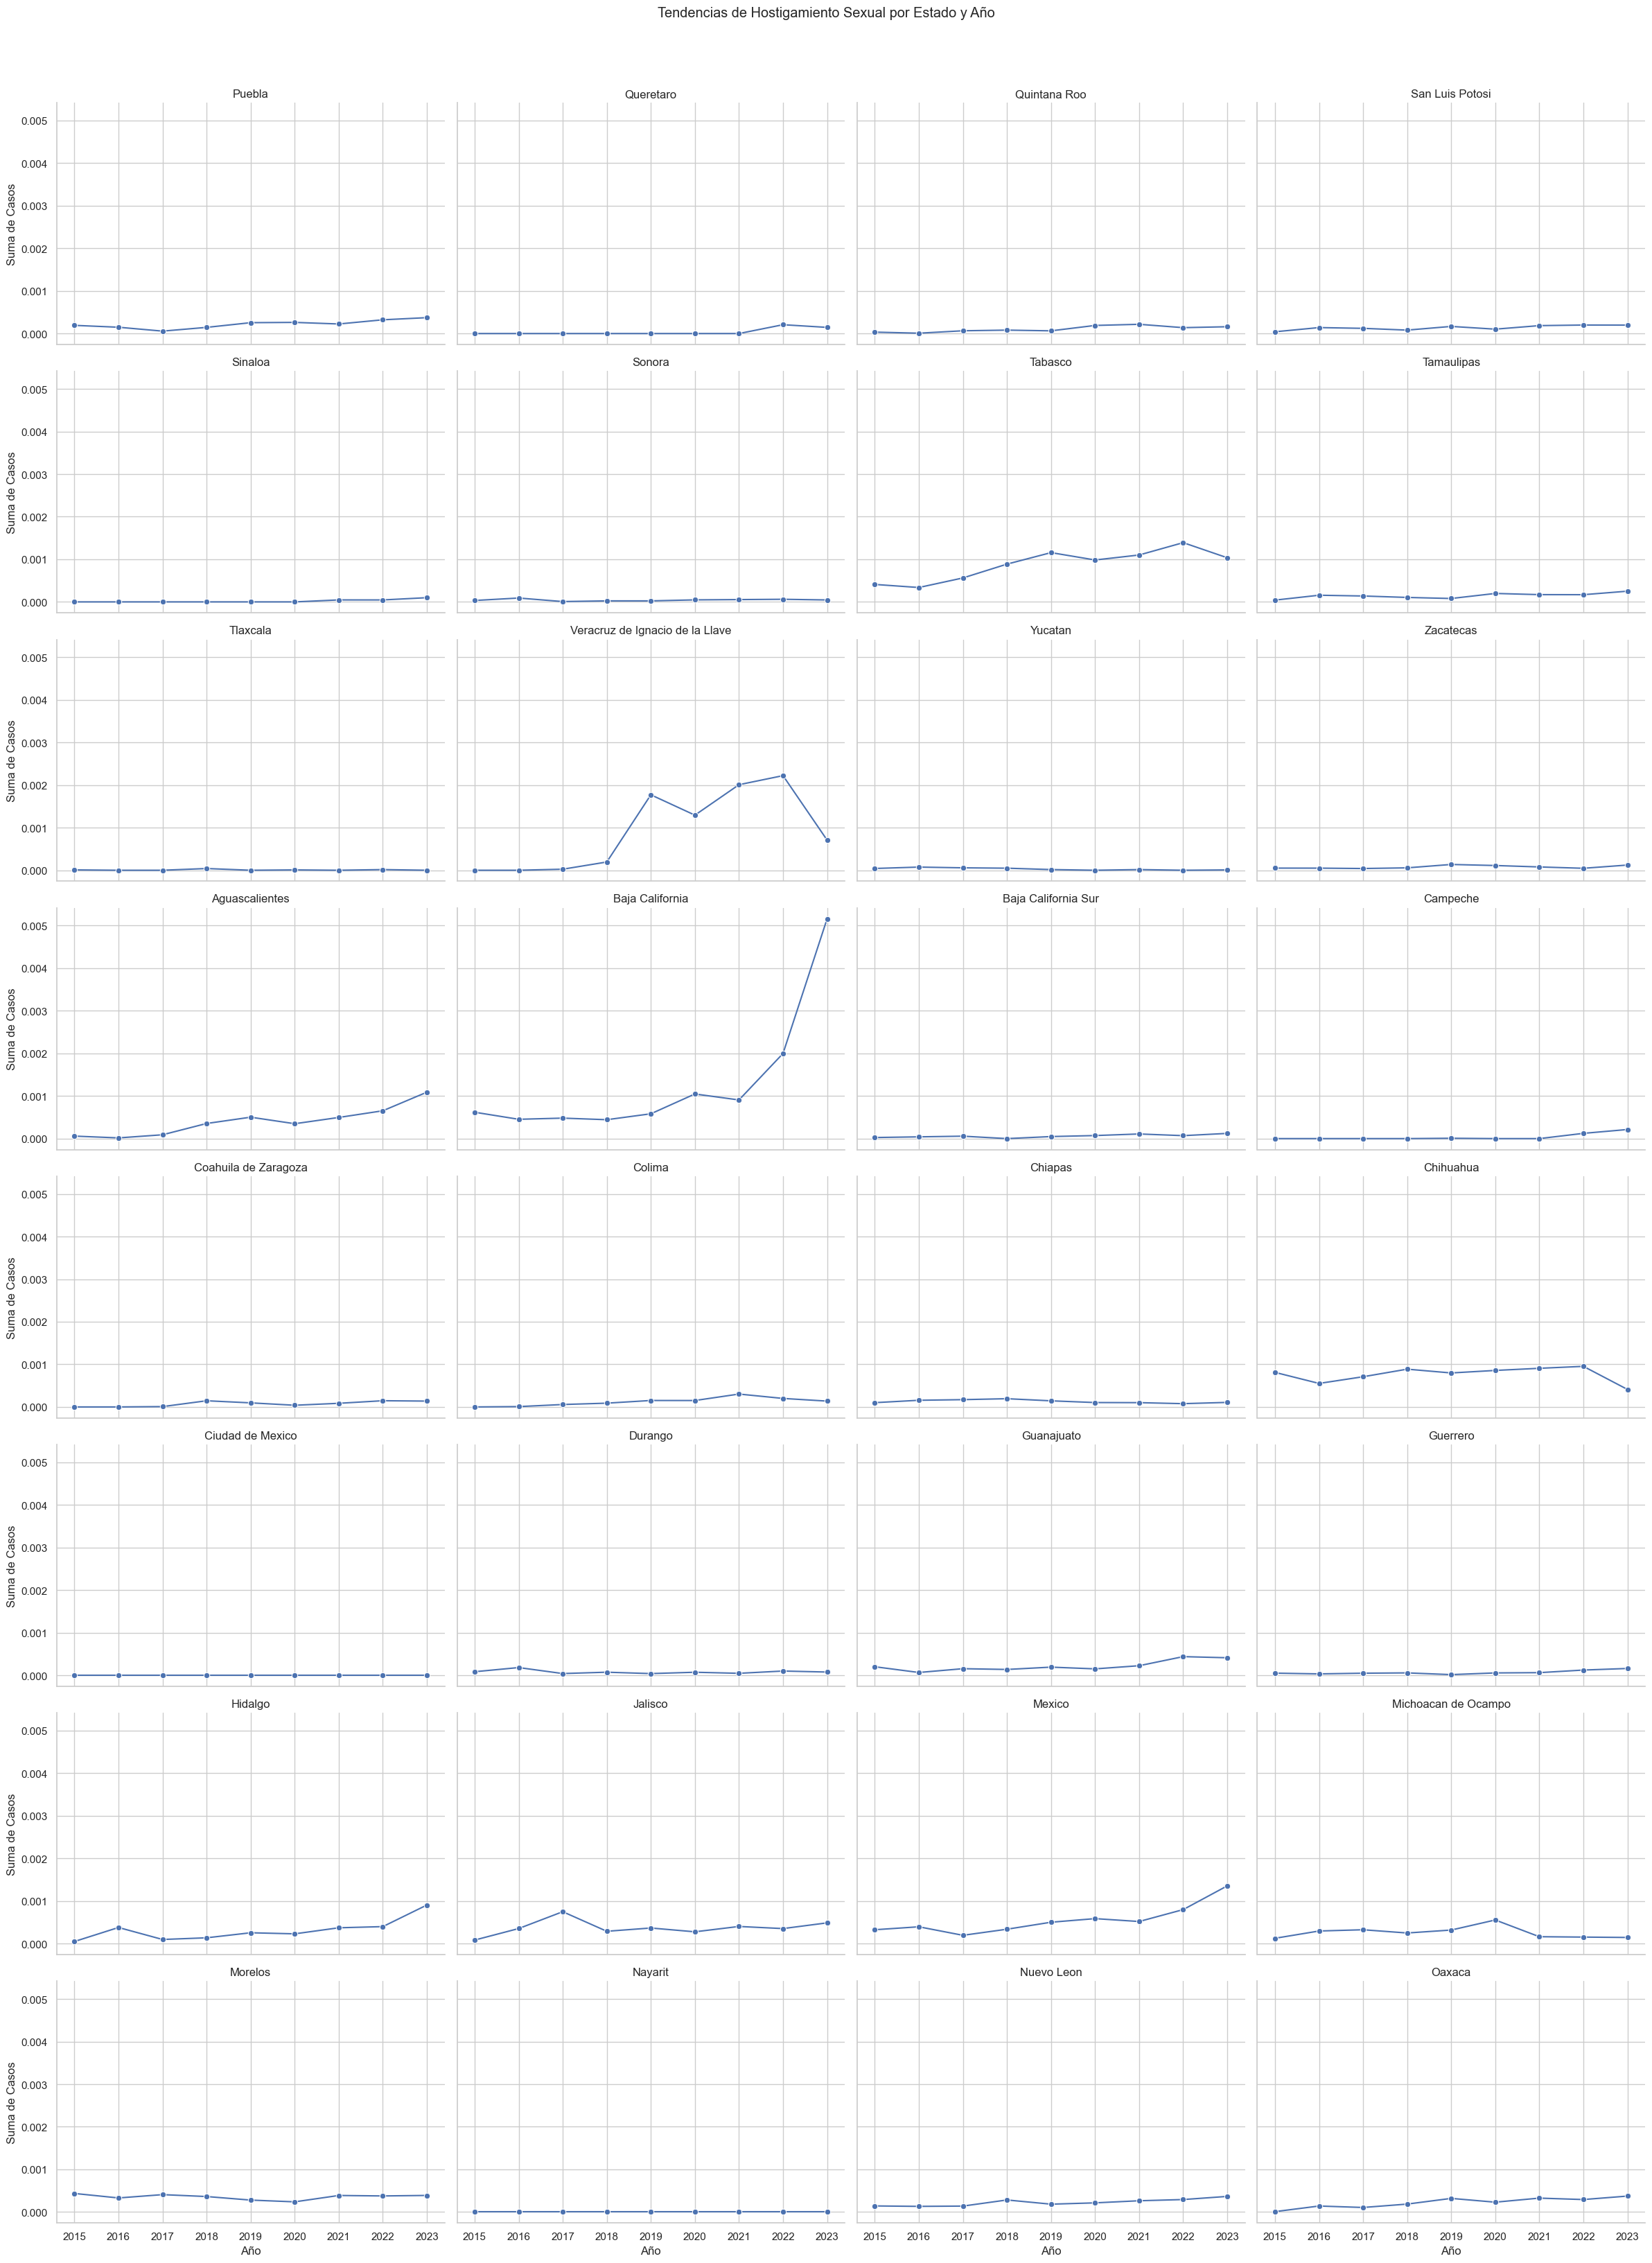

In [44]:
# Filter the data to focus only on "Hostigamiento sexual"
df_hostigamiento_sexual = df_sex_agresion[df_sex_agresion['Tipo_de_abuso'] == 'Hostigamiento sexual']
# Inicializar un FacetGrid para crear "small multiples" (múltiples subgráficos).
# El argumento 'col' indica que queremos un subgráfico por cada estado.
# 'col_wrap=4' establece que habrá 4 subgráficos por fila.
# 'height=4' y 'aspect=1.5' controlan el tamaño de cada subgráfico.
g = sns.FacetGrid(df_hostigamiento_sexual, col="Estado", col_wrap=4, height=4, aspect=1.5)

# Mapear un gráfico de líneas en cada FacetGrid.
# El primer argumento indica el eje x ("A_o" para año), y el segundo es el eje y ("Valor").
# 'estimator=sum' suma todos los valores para cada año.
# 'ci=None' desactiva el intervalo de confianza alrededor de la línea.
# 'marker='o'' usa círculos como marcadores en la línea.
g.map(sns.lineplot, "A_o", "Cuenta_Normalizada", estimator=sum, errorbar=None, marker='o')

# Añadir títulos y etiquetas a los ejes.
# 'set_axis_labels' añade etiquetas a los ejes x e y.
# 'set_titles' añade un título a cada subgráfico, usando el nombre del estado.
g.set_axis_labels("Año", "Suma de Casos")
g.set_titles("{col_name}")

# Añadir un título general a toda la figura
g.fig.suptitle('Tendencias de Hostigamiento Sexual por Estado y Año', y=1.02)


# Mostrar el gráfico.
# 'tight_layout()' ajusta automáticamente los subgráficos para que no se superpongan.
plt.tight_layout()
plt.show()